# ResNet50 ile Transfer Learning
Aşağıdaki Python kodu ile, /dataset/ klasöründeki her sınıfı %80 eğitim ve %20 doğrulama verisi olacak şekilde train/ ve val/ klasörlerine ayırdım. Bu işlem, transfer learning için veri setini hazırlamanın önemli bir adımıydı. Eğitim ve doğrulama verilerini ayrı klasörlere bölerek, modelin eğitimi sırasında doğru bir şekilde doğrulama yapabilmesini sağladım.

In [2]:
import os
import shutil
import random

# Ana dataset klasörü
dataset_dir = r'C:\Users\USER\Desktop\dataset'  

# Yeni oluşturulacak klasörler
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

# Sınıf isimleri
classes = ['NORMAL', 'CNV', 'DME', 'DRUSEN']

# Eğitim/Doğrulama oranı
split_ratio = 0.8  # %80 eğitim

# Eğitim ve doğrulama klasörlerini oluştur
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

# Her sınıftaki resimleri bölüştür
for cls in classes:
    src_folder = os.path.join(dataset_dir, cls)
    images = os.listdir(src_folder)
    random.shuffle(images)  # Karıştır
    split_point = int(len(images) * split_ratio)

    train_images = images[:split_point]
    val_images = images[split_point:]

    # Eğitim resimleri kopyalanıyor
    for img in train_images:
        src_path = os.path.join(src_folder, img)
        dst_path = os.path.join(train_dir, cls, img)
        shutil.copy(src_path, dst_path)

    # Doğrulama resimleri kopyalanıyor
    for img in val_images:
        src_path = os.path.join(src_folder, img)
        dst_path = os.path.join(val_dir, cls, img)
        shutil.copy(src_path, dst_path)

print("Veriler train/val olarak bölüştürüldü! ")


Veriler train/val olarak bölüştürüldü! 


İşlenmiş verilerin bulunduğu klasöründeki her sınıfı %80 eğitim ve %20 doğrulama verisi olacak şekilde train/ ve val/ klasörlerine ayırdım.

In [4]:
  import os
import shutil
import random

# Ana dataset klasörü
dataset_dir = r'C:\Users\USER\Desktop\processed_eye_dataset'  

# Yeni oluşturulacak klasörler
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

# Sınıf isimleri
classes = ['NORMAL', 'CNV', 'DME', 'DRUSEN']

# Eğitim/Doğrulama oranı
split_ratio = 0.8  # %80 eğitim

# Eğitim ve doğrulama klasörlerini oluştur
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

# Her sınıftaki resimleri bölüştür
for cls in classes:
    src_folder = os.path.join(dataset_dir, cls)
    images = os.listdir(src_folder)
    random.shuffle(images)  # Karıştır
    split_point = int(len(images) * split_ratio)

    train_images = images[:split_point]
    val_images = images[split_point:]

    # Eğitim resimleri kopyalanıyor
    for img in train_images:
        src_path = os.path.join(src_folder, img)
        dst_path = os.path.join(train_dir, cls, img)
        shutil.copy(src_path, dst_path)

    # Doğrulama resimleri kopyalanıyor
    for img in val_images:
        src_path = os.path.join(src_folder, img)
        dst_path = os.path.join(val_dir, cls, img)
        shutil.copy(src_path, dst_path)

print("Veriler train/val olarak bölüştürüldü! ")


Veriler train/val olarak bölüştürüldü! 


### ResNet50 Modeli ile Transfer Learning Uygulaması

Orjinal veriler ile modeli eğittim.

Found 640 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.1841 - loss: 1.7869 - val_accuracy: 0.2500 - val_loss: 1.3987
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2456 - loss: 1.4948 - val_accuracy: 0.2688 - val_loss: 1.3827
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2463 - loss: 1.4506 - val_accuracy: 0.2937 - val_loss: 1.3775
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2955 - loss: 1.4011 - val_accuracy: 0.2500 - val_loss: 1.3933
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2599 - loss: 1.3928 - val_accuracy: 0.3313 - val_loss: 1.3832
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2679 - loss: 1.3915 - val_accuracy: 0.2438 - val_loss: 1.3803
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2540 - loss: 1.3820 - val_accuracy: 0.2812 - val_loss: 1.3760
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3096 - loss: 1.3780 - val_accuracy: 0.3562 - val_loss:

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


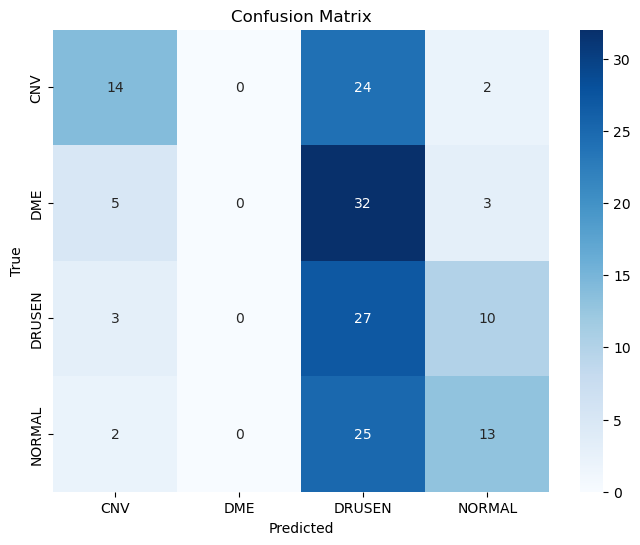

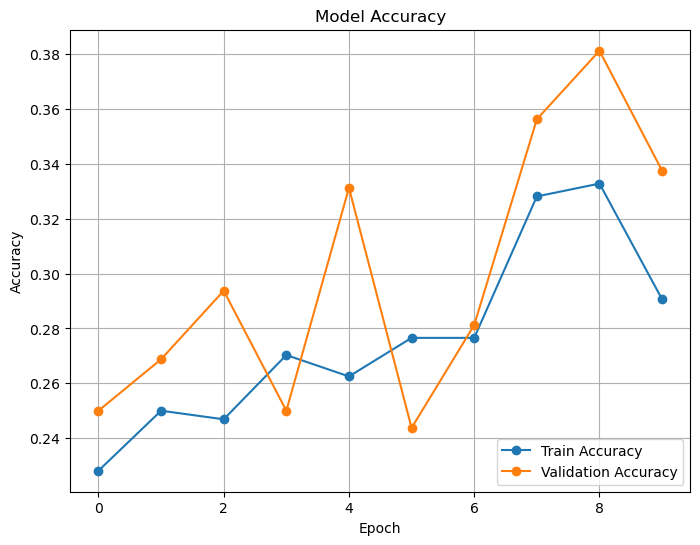

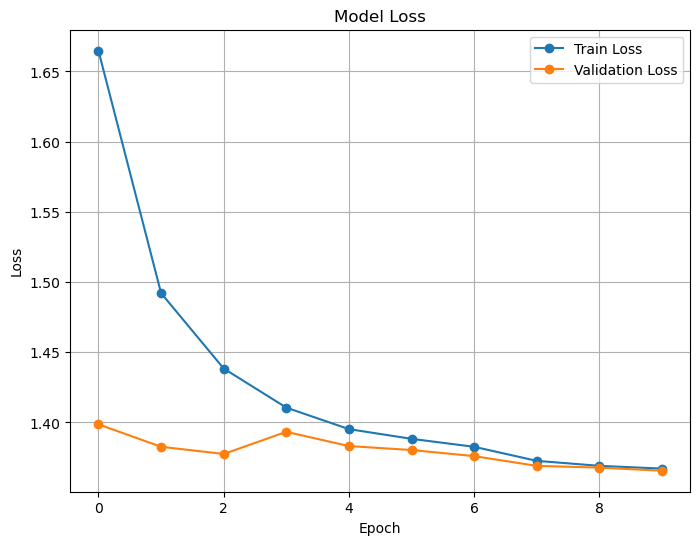

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 
train_dir = r'C:\Users\USER\Desktop\dataset/train'
val_dir = r'C:\Users\USER\Desktop\dataset/val'

# Parametreler
batch_size = 32
img_height, img_width = 224, 224
epochs = 10

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Veriyi hazırlıyoruz
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ResNet50 modelini çağırıyoruz
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Modelin üstüne kendi katmanlarımızı ekliyoruz
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 sınıf için

model = Model(inputs=base_model.input, outputs=predictions)

# İlk başta base_model katmanlarını donduruyoruz
for layer in base_model.layers:
    layer.trainable = False

# Modeli derliyoruz
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitiyoruz
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Eğitim sonrası: Tahminler
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Sınıf isimleri
class_names = list(val_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(val_generator.classes, y_pred)

# Confusion Matrix Gösterimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Eğitim ve doğrulama accuracy çizimi
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Eğitim ve doğrulama loss çizimi
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### İşlenmiş Veriler ile modeli tekrar eğittim.

Found 640 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2532 - loss: 1.8164 - val_accuracy: 0.3500 - val_loss: 1.3985
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3530 - loss: 1.4641 - val_accuracy: 0.3938 - val_loss: 1.2642
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3679 - loss: 1.2994 - val_accuracy: 0.4062 - val_loss: 1.2761
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4067 - loss: 1.2977 - val_accuracy: 0.4563 - val_loss: 1.2367
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4254 - loss: 1.2211 - val_accuracy: 0.4437 - val_loss: 1.2061
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4067 - loss: 1.2054 - val_accuracy: 0.4812 - val_loss: 1.1770
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5144 - loss: 1.1501 - val_accuracy: 0.5188 - val_loss: 1.1576
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4834 - loss: 1.1443 - val_accuracy: 0.4563 - val_loss:

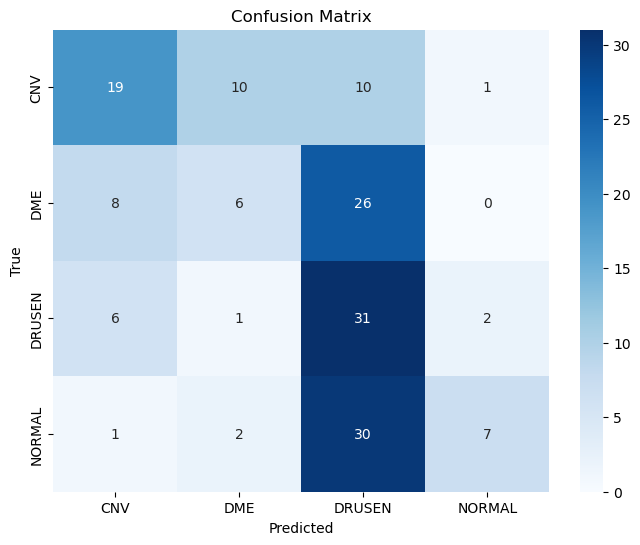

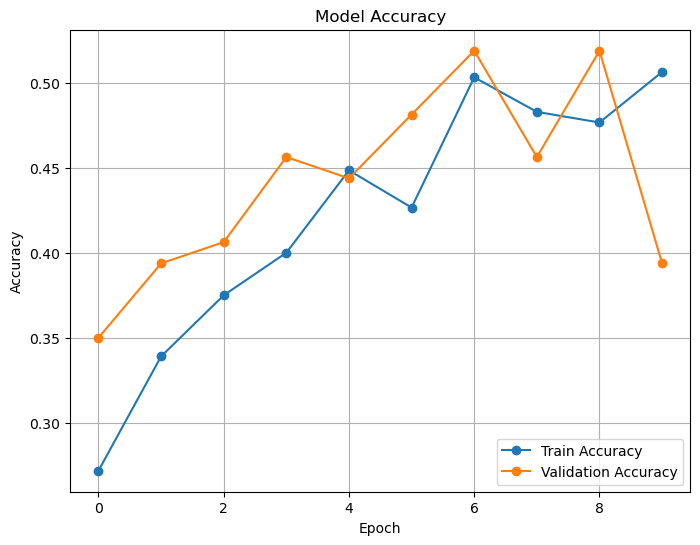

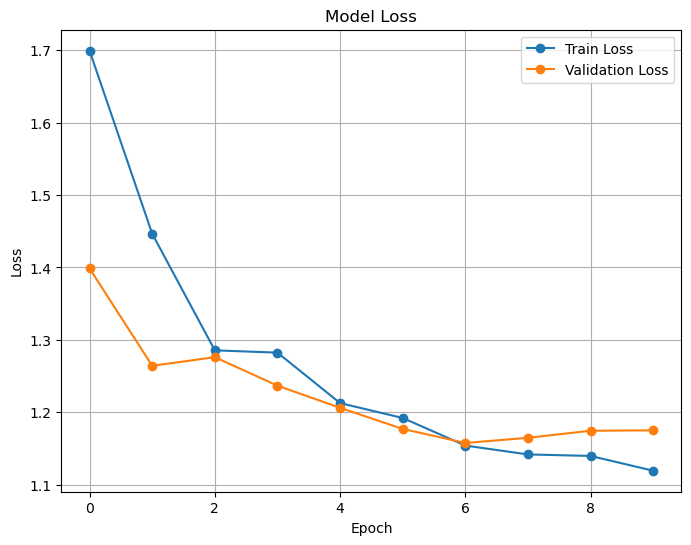

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset yolu
train_dir = r'C:\Users\USER\Desktop\processed_eye_dataset/train'
val_dir = r'C:\Users\USER\Desktop\processed_eye_dataset/val'

# Parametreler
batch_size = 32
img_height, img_width = 224, 224
epochs = 10

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Veriyi hazırlıyoruz
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ResNet50 modelini çağırıyoruz
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Modelin üstüne kendi katmanlarımızı ekliyoruz
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 sınıf için

model = Model(inputs=base_model.input, outputs=predictions)

# İlk başta base_model katmanlarını donduruyoruz
for layer in base_model.layers:
    layer.trainable = False

# Modeli derliyoruz
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitiyoruz
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Eğitim sonrası: Tahminler
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Sınıf isimleri
class_names = list(val_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(val_generator.classes, y_pred)

# Confusion Matrix Gösterimi
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Eğitim ve doğrulama accuracy çizimi
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Eğitim ve doğrulama loss çizimi
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Model Performans Karşılaştırması

In [22]:
import pandas as pd

# Tabloyu oluşturma
data = {
    'Ölçüt': ['Doğruluk (Accuracy)', 'Duyarlılık (Recall)', 'Özgüllük (Specificity)', 'Kesinlik (Precision)', 'F1-Score'],
    'Orijinal Veri': [0.34, 0.34, 0.779, 0.32, 0.30],
    'İşlenmiş Veri': [0.39, 0.39, 0.798, 0.47, 0.36]
}

# DataFrame'e dönüştürme
df = pd.DataFrame(data)

# Tabloyu görüntüleme
df


,Ölçüt,Orijinal Veri,İşlenmiş Veri
0,Doğruluk (Accuracy),0.340,0.390
1,Duyarlılık (Recall),0.340,0.390
2,Özgüllük (Specificity),0.779,0.798
3,Kesinlik (Precision),0.320,0.470
4,F1-Score,0.300,0.360


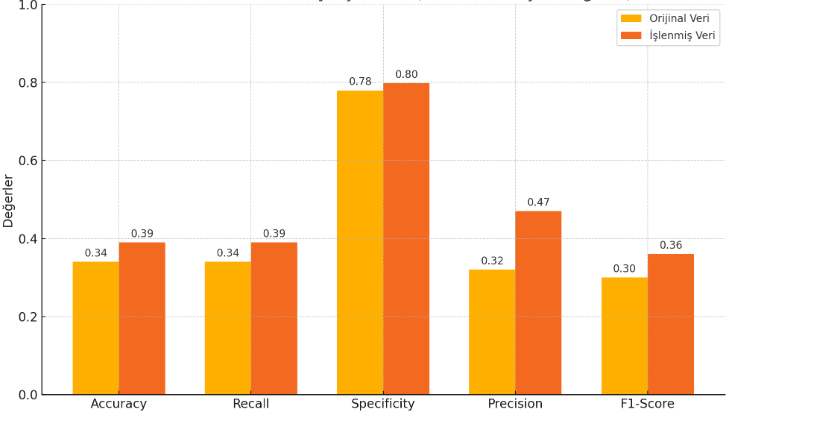

In [24]:
from IPython.display import Image, display
image_path = r'C:\Users\USER\Desktop\Ödev1Rapor\histogram.png'  
display(Image(filename=image_path))

Bu çalışma kapsamında, ResNet50 modeli kullanılarak hem orijinal hem de işlenmiş veriler üzerinde eğitim yapılmıştır. Model performansları doğruluk, duyarlılık, özgüllük, kesinlik ve F1 skoru ölçütleri kullanılarak karşılaştırılmıştır.